# Algerian Forest Fires Dataset - Data Analysis And Regression Model Building

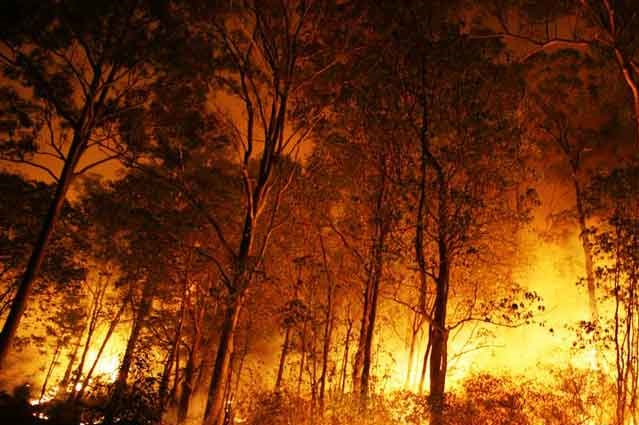

In [1]:
from IPython.display import Image
Image(filename="R:/Forest_fires1.jpg")

# Life cycle of Machine learning Project

Understanding the Problem Statement

Data Collection

Data Cleaning

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model

# Problem statement.

1.The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

2.If User can Predict the Temperature Based on Different- Different Features.

3.Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it infuture

# Data Collection.

1.The Dataset is collected from Website named,UCI Machine Learning Repository.
2.The data consists of 15 columns and 244 rows

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("R:\ML\linear\Algerian_forest_fires_dataset.csv")

# Exploratory Data Analysis

Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

# Feature Information

Algerian Forest Fires:
1. Date : (DD/MM/YYYY)Day, month ('june' to 'september'), year (2012)
2. Temp :temperature noon (temperature max)in Celsius degrees: 22 to 42
3. RH :RelativeHumidity in%: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain:total day in mm: 0 to 16.8 FWI
        
Components:
1. Fine Fuel Moisture Code (FFMC)index from the FWI system: 28.6 to 92.5
2. Duff Moisture Code (DMC)index from the FWI system: 1.1 to 65.9
3. Drought Code (DC) index from the FWI system: 7 to 220.4
4. Initial Spread Index (ISI)index from the FWI system: 0 to 18.5
5. Buildup Index (BUI) index from the FWI system: 1.1 to 68
6. Fire Weather Index (FWI)Index: 0 to 31.1
7. Classes:two classes, namely Fire and not Fire

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

Removing Unnecessary Rows From Dataset

In [4]:
#Removing Unnecessary Rows From Dataset after Observing the Dataset.
df.drop(index=[122,123], inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

Adding New Feature, named 'Region' in a Dataset

In [5]:
#Adding New Feature, named 'Region' in a Dataset

df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

Stripping the names of the columns

In [6]:
#Stripping the names of the columns

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

Stripping the Classes Features data

In [7]:
#Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [8]:
df['Classes'].dtype

dtype('O')

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


Changing The DataTypes of the Columns

In [10]:
#Changing The DataTypes of the Columns

df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','year'

In [12]:
#Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','y

df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [13]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


# EXPLORING DATA

Profile of the Data

In [14]:
#Getting shape and size
df.shape

(244, 13)

In [15]:
#Columns of the Dataset
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [16]:
#Check if Missing Value Present or Not in Dataset.
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

We get one Null Value in 'Classes' Feature

In [17]:
#Unique Value of Classes feature
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [18]:
#Handling Categorical Feature Classes

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


In [19]:
# Focus on Replacing Null Value
# The best Way of Replacing Null Value by using mode

df['Classes'].mode() [0]

1.0

In [20]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [21]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

Now We have no any Null Value in dataset

In [22]:
df['Classes'].unique()

array([0., 1.])

Check Datatypes in the dataset

In [23]:
#Check Null & getting feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [24]:
#Checking the usage of the memory by the dataset
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

# Numerical and Categorical Columns

Numerical Dataset

In [25]:
# 1. Getting Numerical features from dataset
# 2. Creating Numerical dataframe
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# Print Numerical Features
print('We have {} numerical features : {}'.format(len(numerical_features), 
                                                  numerical_features))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


Categorical Dataset

In [26]:
# 1.Getting Categorical features from dataset
# 2.Creating Categorical dataframe
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('\n We have {} categorical features : {}'.format(len(categorical_features), 
                                                       categorical_features))


 We have 3 categorical features : ['DC', 'FWI', 'region']


# Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable

In [27]:
df.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

# Scatter plot to see the trends in each numerical column

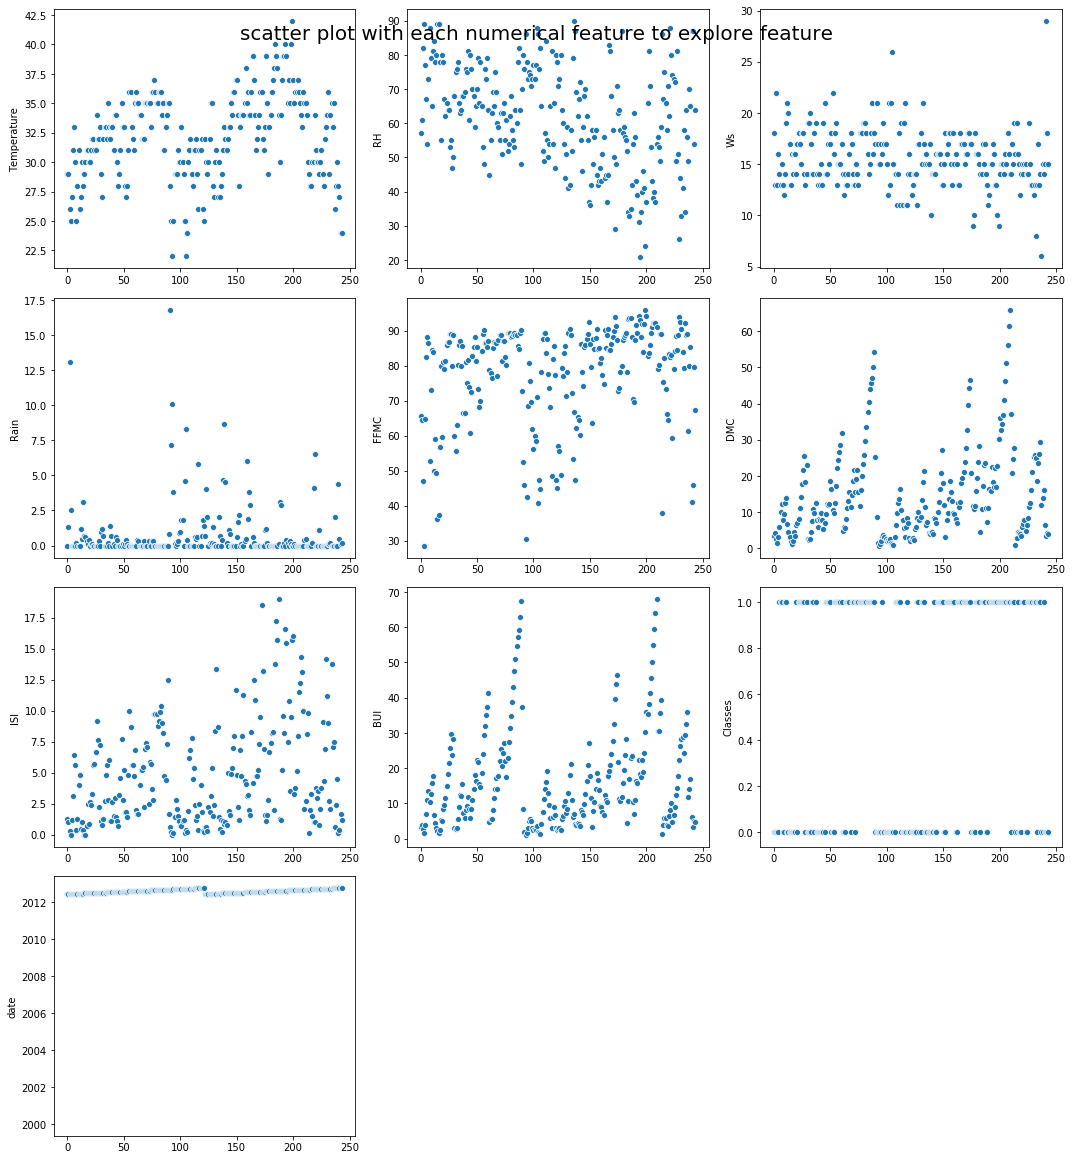

In [30]:
# scatter plot to see the trends in each numerical column
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df)
    plt.tight_layout()

# Categorical Features Analysis

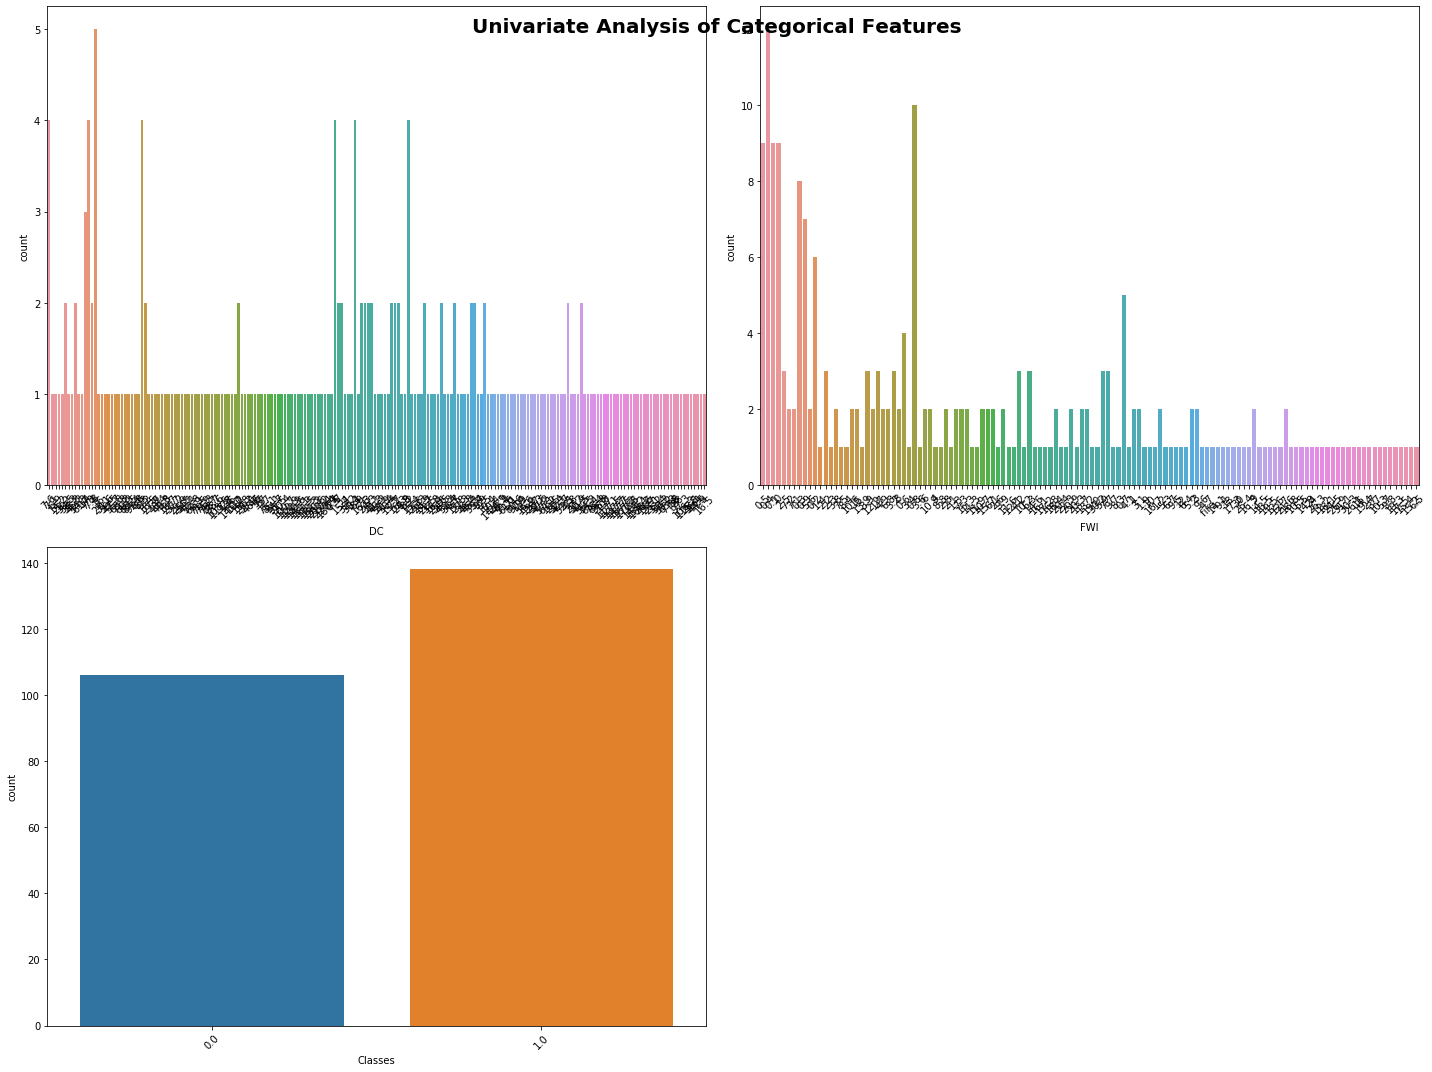

In [32]:
#categorical columns Analysis
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20, fontweight='bold')
cat1 = ['DC', 'FWI', 'Classes']
             
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

observation 

Extreme value of Temperature is above 40

Most of the time RH is above 30

WS values lie between 10 to 20

# Bivariate analysis and multivariate analysis

In [34]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

# Multicollinearity in numerical features

In [35]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


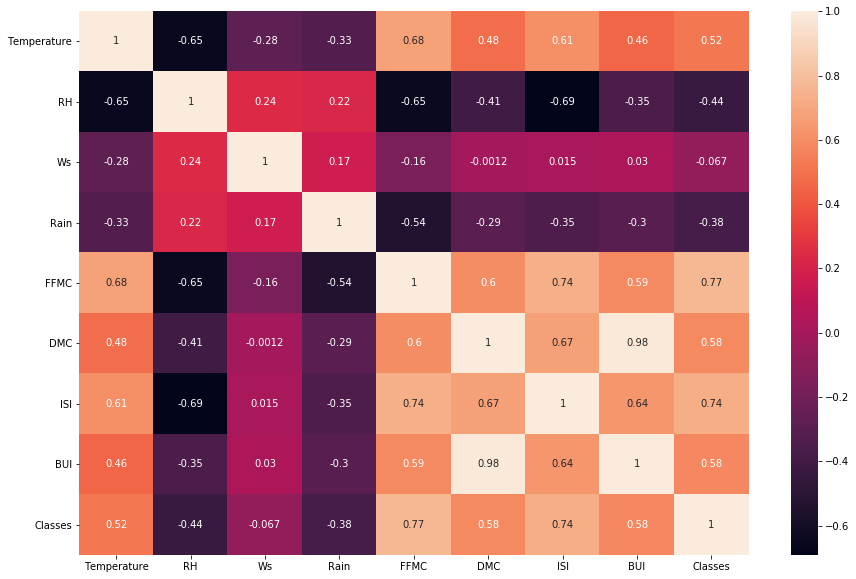

In [36]:
#Plotting Heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

observation 

Highly +ve correlated features are DMC and BUI

Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI

strip plot to see the relationship between numerical features and target

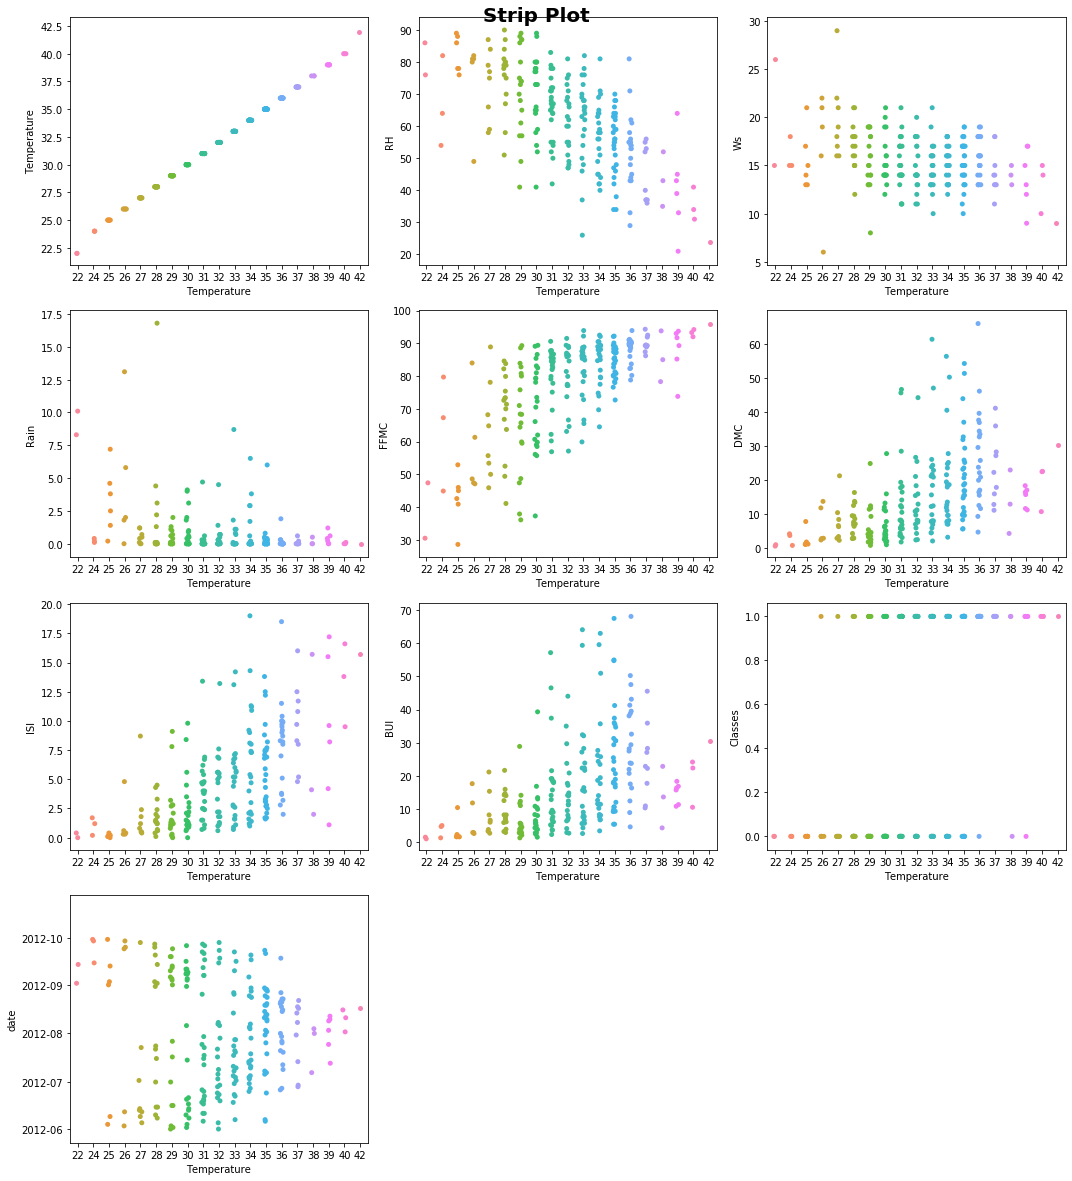

In [38]:
#strip plot to see the relationship between numerical features and target
#Targeted Feature is "Temperature"
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Temperature', data=df)
    plt.tight_layout()

observation

Note :- Here Targeted Feature is 'Temperature'
    
places with higher 'RH' has Lower 'Temperature'

places with lower 'WS' has higher 'Temperature'

places with FFMC > 80 has higher 'Temperature'

places wiht ISI > 15.0 has higher 'Temperature'

# Statistical Analysis

In [40]:
# Display summary statistics for a dataframe
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


Observation

df.describe() return all Statistics Summary of Numeric Columns.

Its Return function like:- count(), mean(), std(), min(), 25%(), 50%(), 75%(), max().

# Graphical Analysis

# Which area has most of the time High Temperatures ?

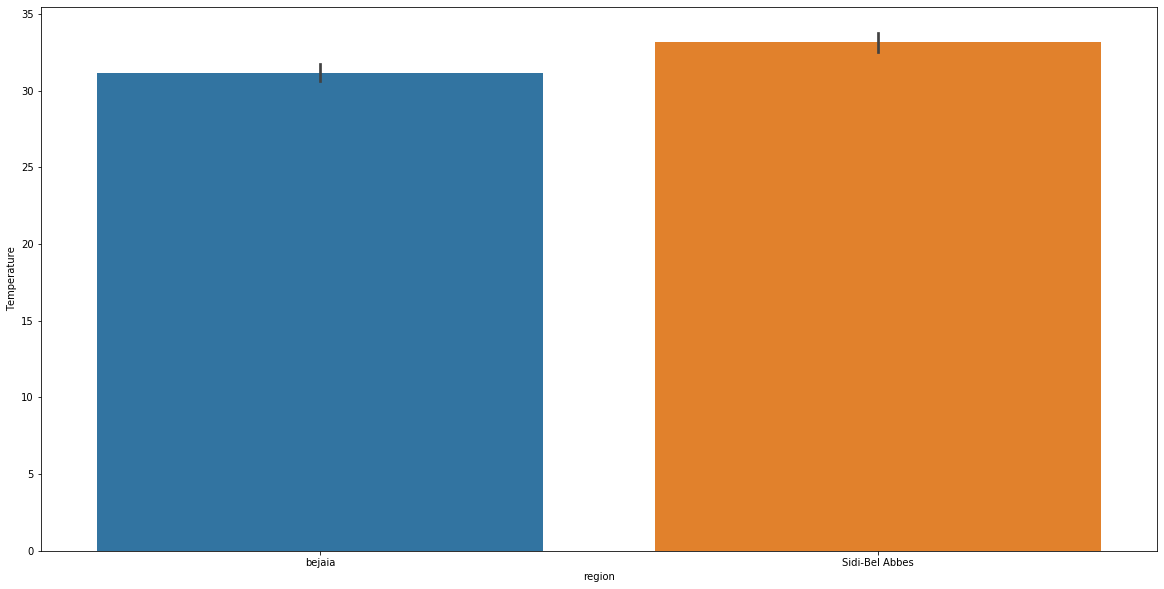

In [42]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="region",y="Temperature",data=df)

# Highest Temperature attained

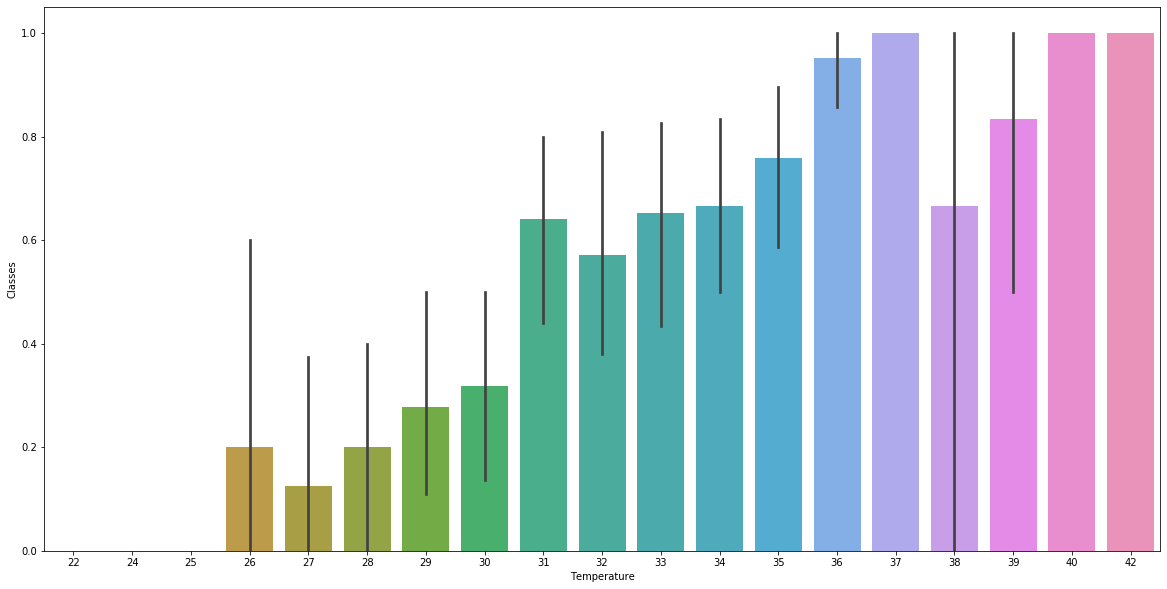

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot( x="Temperature", y="Classes",data=df)

# What are most time rain happens in Respect with Temperature

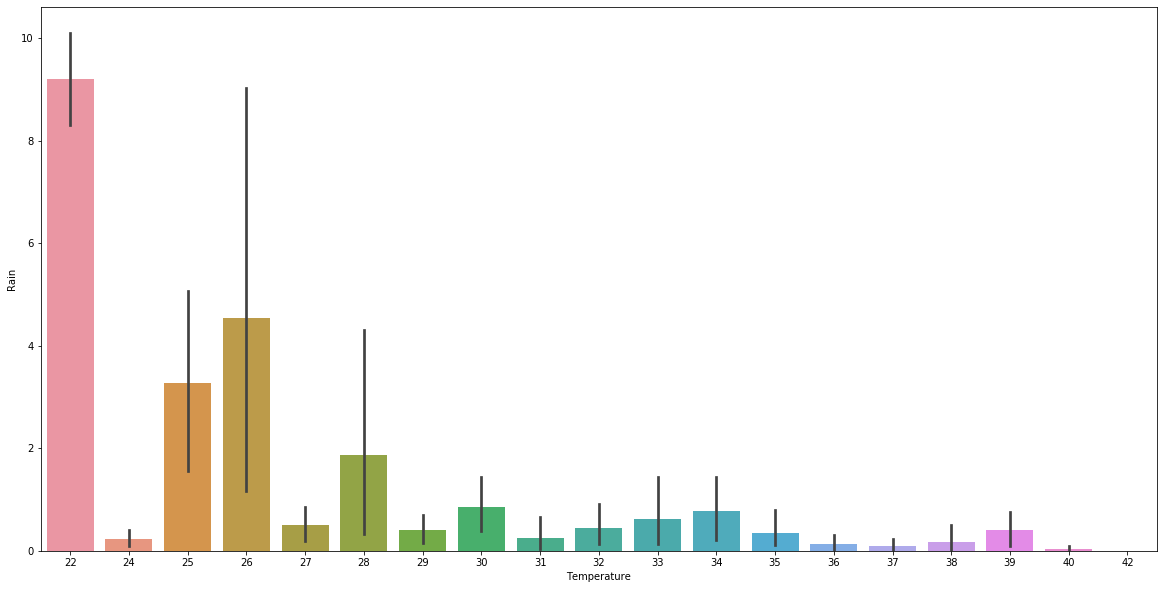

In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="Temperature",y="Rain",data=df)

Observation

Where Rain is Higher , the Temperature is low.

Where Rain is Low, the Temperature is high.

# Boxplot of Class Vs Temperature

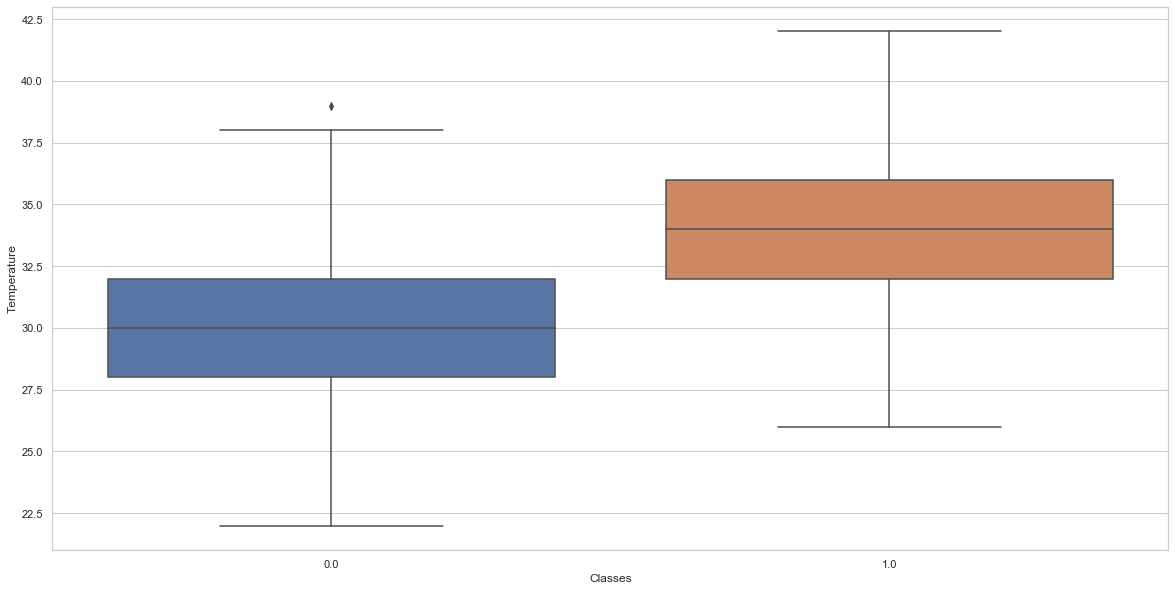

In [47]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn
# importing the required module
import seaborn
# use to set style of background of plot
seaborn.set(style="whitegrid")
# loading data-set
seaborn.boxplot(x ='Classes', y ='Temperature', data = df)

# Boxplot of Temperature Vs Rain

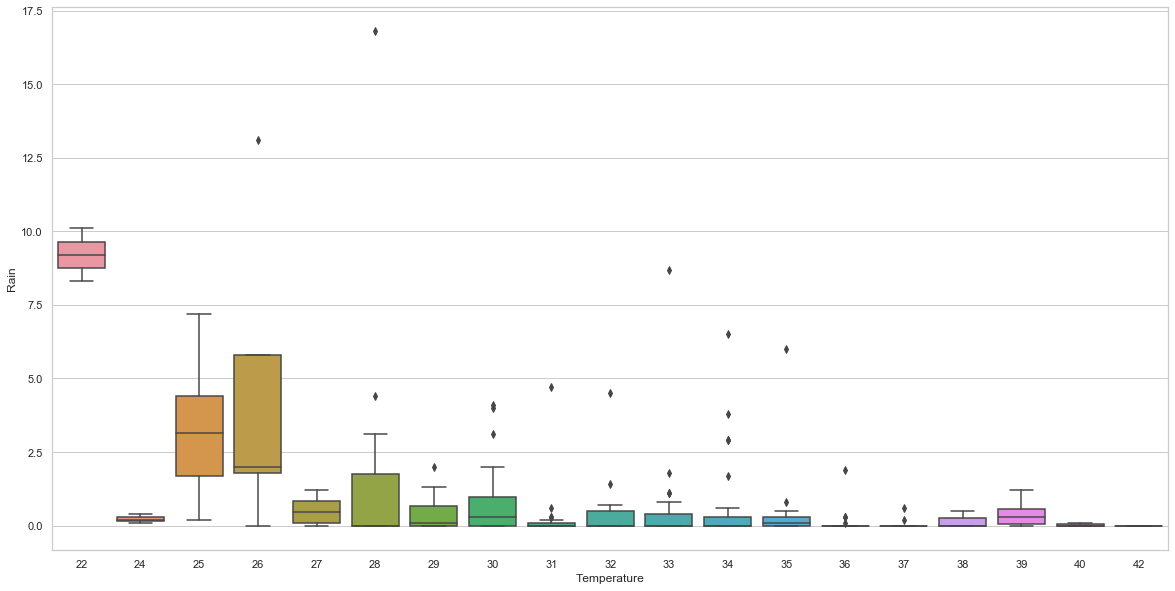

In [49]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn
# importing the required module

import seaborn
# use to set style of background of plot
seaborn.set(style="whitegrid")
# loading data-set
seaborn.boxplot(x ='Temperature', y ='Rain', data = df)

Observation

Where Rain is Higher , the Temperature is low.

Where Rain is Low, the Temperature is high

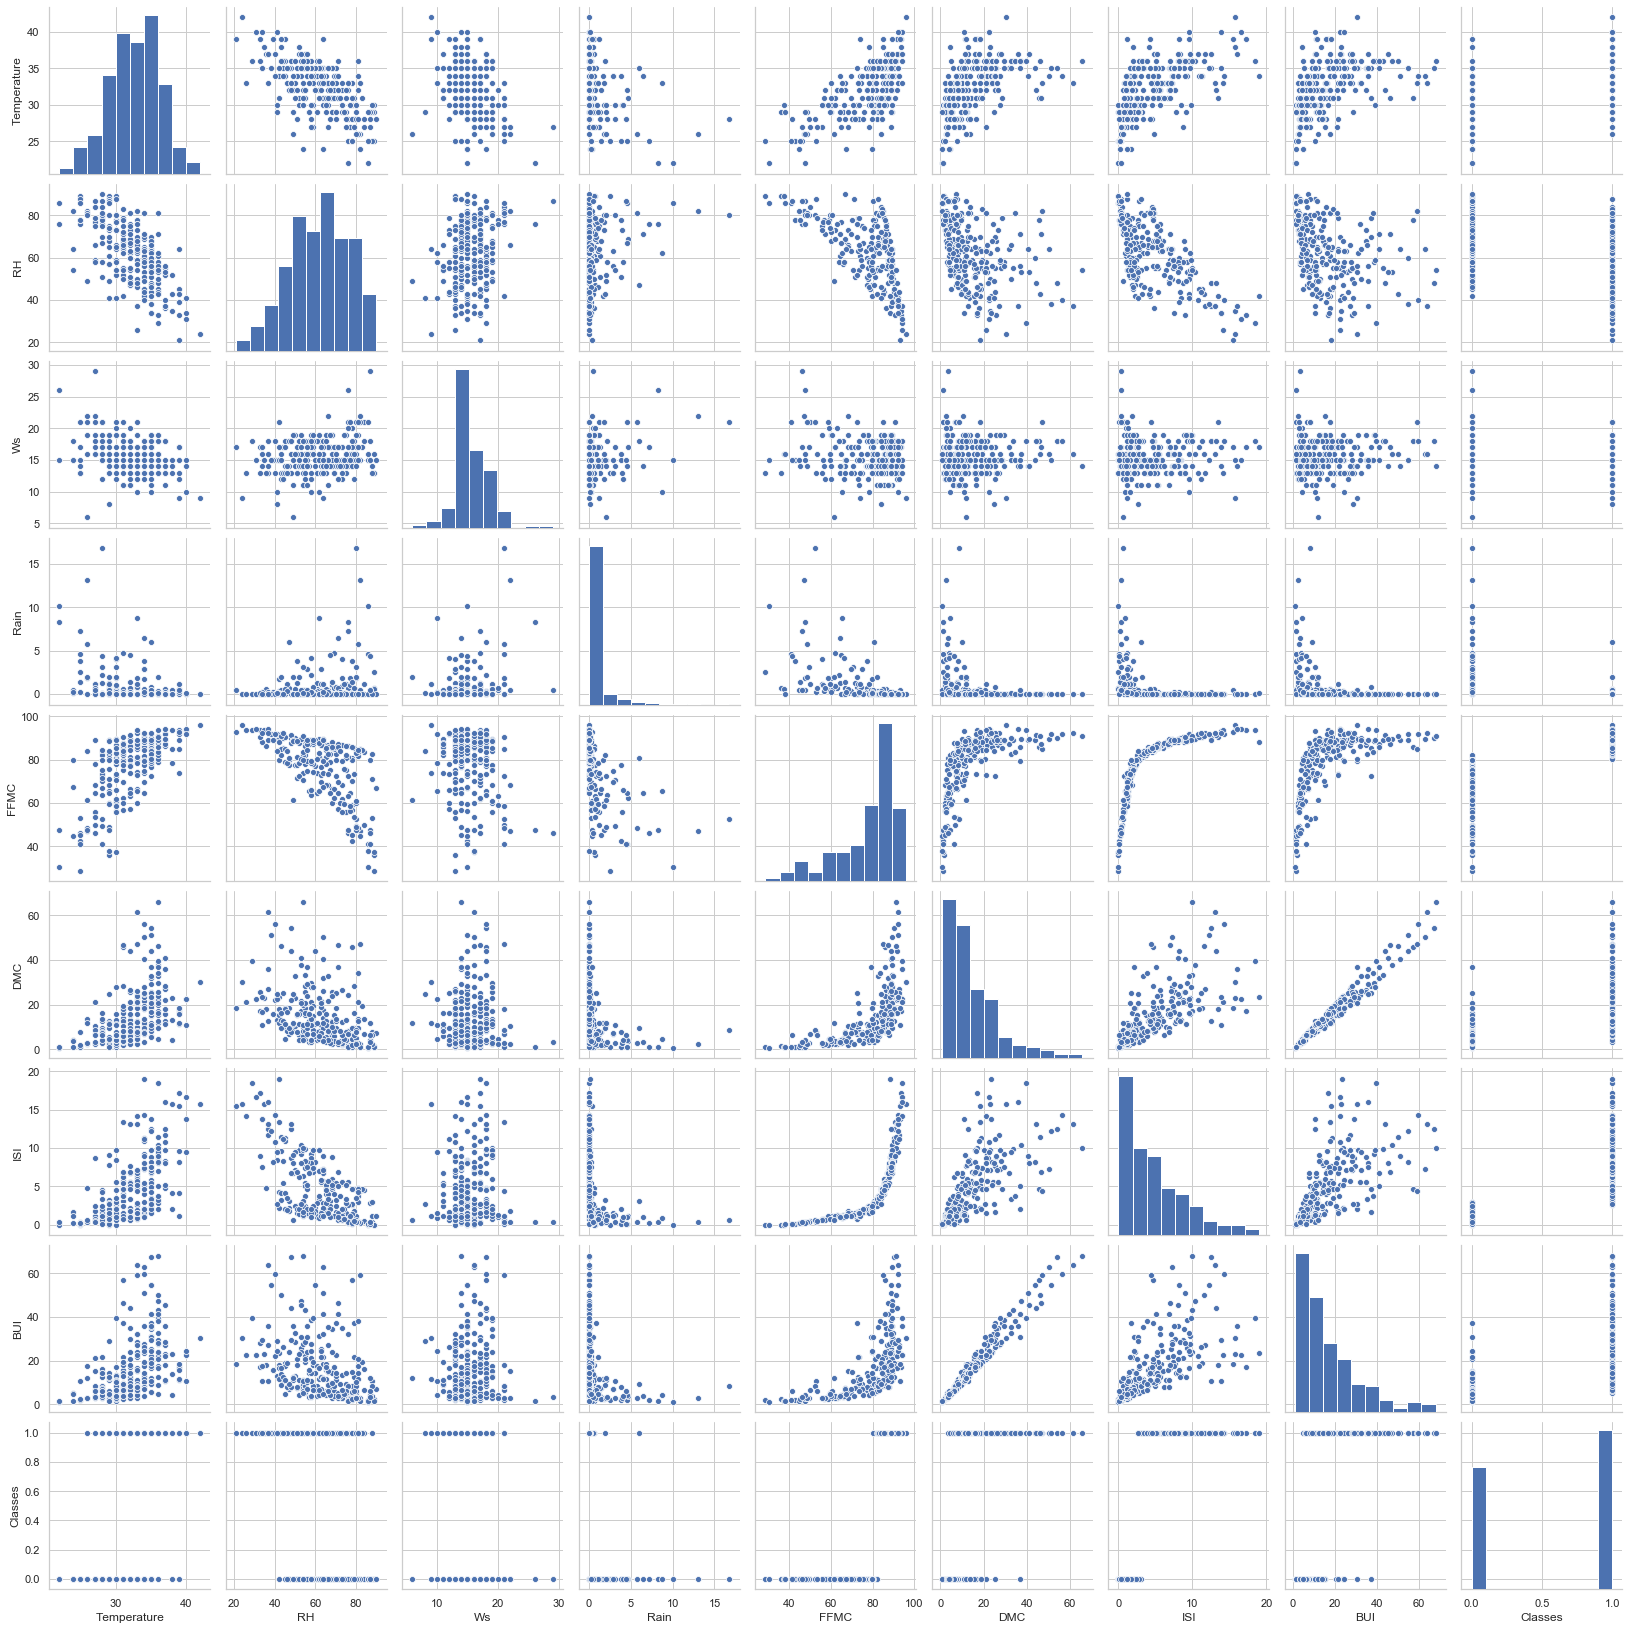

In [50]:
import seaborn as sns
sns.pairplot(df)

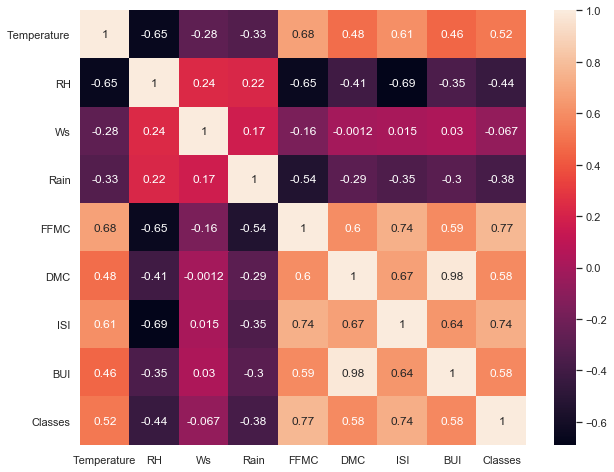

In [51]:
sns.set(rc = {'figure.figsize' : (10,8)})
sns.heatmap(df.corr(), annot = True)

Text(0, 0.5, 'Temperature')

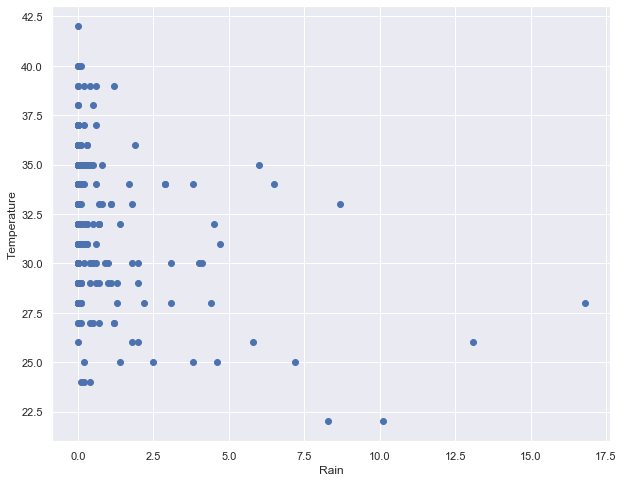

In [52]:
plt.scatter(df['Rain'],df['Temperature'])
plt.xlabel("Rain")
plt.ylabel("Temperature")

Observation

Where Rain is Higher , the Temperature is low.

Where Rain is Low, the Temperature is high.

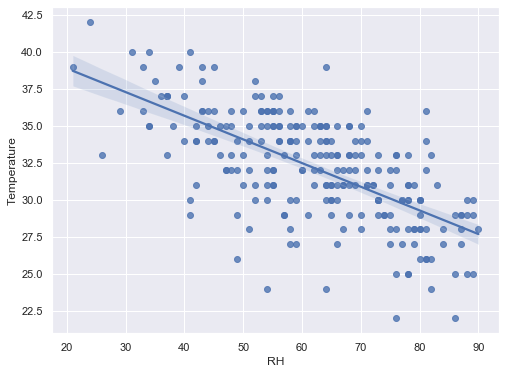

In [54]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x = "RH", y = "Temperature", data = df)

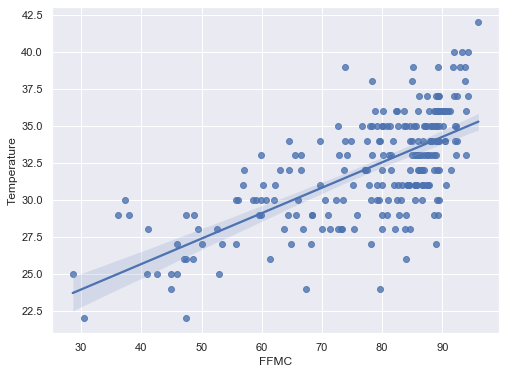

In [55]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="FFMC",y="Temperature",data=df)

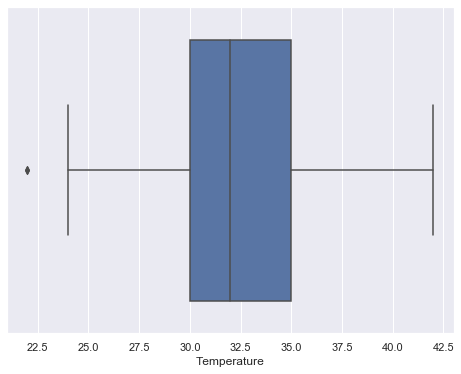

In [56]:
sns.boxplot(df['Temperature'])

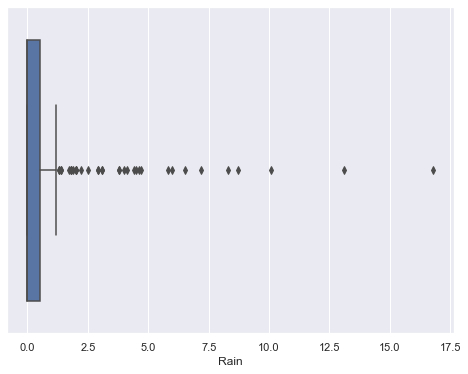

In [57]:
sns.boxplot(df['Rain'])

In [58]:
df.head(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04


# Data Cleaning for Better Model Prediction

Converting Object Dtype to Float Dtype for Model Accuracy in X_train dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [60]:
df['DC'].dtype

dtype('O')

In [61]:
df['FWI'].dtype

dtype('O')

In [62]:
#In DC & FWI Feature there are many Object Dtype Available, after Observing ,I Drop

df = df.drop(columns = ('DC'), axis = 1)
df = df.drop(columns = ('FWI'), axis = 1)

In [63]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0,Sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,Sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0,Sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0,Sidi-Bel Abbes,2012-09-29


In [64]:
#Independent and Dependent Feature

x = df.iloc[:, 1:-2] 
y = df.iloc[:,0]

In [65]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0


In [66]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, 
                                                   random_state=10)

In [69]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
237,49,6.0,2.0,61.3,11.9,0.6,11.9,0.0
78,54,18.0,0.0,89.4,20.0,9.7,27.5,1.0
25,64,18.0,0.0,86.8,17.8,6.7,21.6,1.0
124,80,14.0,2.0,48.7,2.2,0.3,2.6,0.0
176,64,9.0,1.2,73.8,11.7,1.1,11.4,0.0
...,...,...,...,...,...,...,...,...
64,69,13.0,0.0,85.0,8.2,4.0,8.2,1.0
15,89,13.0,0.7,36.1,1.7,0.0,2.2,0.0
228,51,13.0,0.0,88.7,16.0,6.9,17.8,1.0
125,64,14.0,0.0,79.4,5.2,2.2,5.6,0.0


In [70]:
X_train.shape

(163, 8)

In [71]:
Y_train

237    26
78     36
25     31
124    29
176    39
       ..
64     34
15     29
228    32
125    30
9      28
Name: Temperature, Length: 163, dtype: int32

In [72]:
Y_train.shape

(163,)

In [73]:
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
162,56,15.0,2.9,74.8,7.1,1.6,6.8,0.0
60,64,17.0,0.0,87.2,31.9,6.8,41.2,1.0
61,45,14.0,0.0,78.8,4.8,2.0,4.7,0.0
63,63,14.0,0.3,76.6,5.7,1.7,5.5,0.0
69,59,17.0,0.0,87.4,14.8,6.9,17.9,1.0
...,...,...,...,...,...,...,...,...
169,68,15.0,0.0,86.1,23.9,5.2,23.9,1.0
232,41,8.0,0.1,83.9,24.9,2.7,28.9,1.0
144,59,16.0,0.8,74.2,7.0,1.6,6.7,0.0
208,37,16.0,0.0,92.2,61.3,13.1,64.0,1.0


In [74]:
X_test.shape

(81, 8)

In [75]:
Y_test

162    34
60     35
61     36
63     35
69     35
       ..
169    33
232    29
144    33
208    33
105    22
Name: Temperature, Length: 81, dtype: int32

In [76]:
Y_test.shape

(81,)

# Standardize or Feature Scalling the Dataset

In [77]:
#Standardize or Feature Scalling the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_test = scaler.transform(X_test)

In [80]:
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.9695694 ,
        -0.32535487, -1.06992376],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.17918645,
         0.76565444,  0.93464604],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.4708054 ,
         0.35302912,  0.93464604],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.5180308 ,
         0.08727045,  0.93464604],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.59176617,
        -0.76595478, -1.06992376],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.80428049,
        -0.27639932, -1.06992376]])

In [81]:
Y_train

237    26
78     36
25     31
124    29
176    39
       ..
64     34
15     29
228    32
125    30
9      28
Name: Temperature, Length: 163, dtype: int32

In [82]:
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -7.33442383e-01,
        -6.82030988e-01, -1.06992376e+00],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  4.94418103e-01,
         1.72378441e+00,  9.34646039e-01],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -6.38991577e-01,
        -8.28897625e-01, -1.06992376e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -7.09829682e-01,
        -7.72948430e-01, -1.06992376e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  5.18030804e-01,
         9.42640966e-02,  9.34646039e-01],
       [-5.91330147e-01,  2.72169591e-01, -4.41414004e-01,
         8.21667676e-01,  1.83544698e+00,  1.34447536e+00,
         2.16438432e+00,  9.34646039e-01],
       [-5.91330147e-01,  1.363078

# Model Training

# Linear Regression Model Prediction

In [83]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [84]:
regression = LinearRegression()

In [85]:
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print the Coefficients and the intercept

In [86]:
#print the Coefficients
print(regression.coef_)

[-1.29919854 -0.53305266 -0.24467182  0.92858531 -0.34598758  0.07149294
  0.72141012  0.15855047]


In [87]:
#print the intercept
print(regression.intercept_)

32.17791411042945


In [88]:
#Prediction for the Test data
reg_pred = regression.predict(X_test)

In [89]:
reg_pred

array([31.69793497, 33.3353358 , 33.52844942, 31.80132345, 33.07743259,
       34.84275471, 33.61175721, 33.46247307, 32.16426973, 33.10278482,
       33.69530552, 27.78603314, 35.37932299, 29.2902435 , 32.1668506 ,
       32.00338801, 34.0988015 , 28.25045526, 36.11064295, 34.49490401,
       32.86731849, 33.56668086, 33.75080481, 32.91743417, 35.77454234,
       28.74173763, 32.20737033, 33.19893452, 27.78209499, 32.18472108,
       26.15107265, 26.92722327, 34.10776387, 31.98651558, 33.00689815,
       30.46739878, 28.89861899, 32.56323949, 27.84591829, 35.38936998,
       32.54493305, 34.10484566, 33.98890395, 31.19087746, 36.40498435,
       34.20350051, 24.80791843, 35.1270552 , 33.91336638, 29.52362175,
       31.30096324, 32.60667273, 35.73093891, 32.30080434, 30.40319541,
       30.13288547, 32.88039608, 36.27194553, 31.24388019, 33.47744575,
       32.48117904, 32.72111765, 31.18249581, 24.58531655, 31.60333681,
       36.04361167, 29.39256881, 29.8117875 , 34.99220619, 33.58

# Assumption of Linear Regression.

In [90]:
#Assumption of Linear Regression.
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Test Predicted Data')

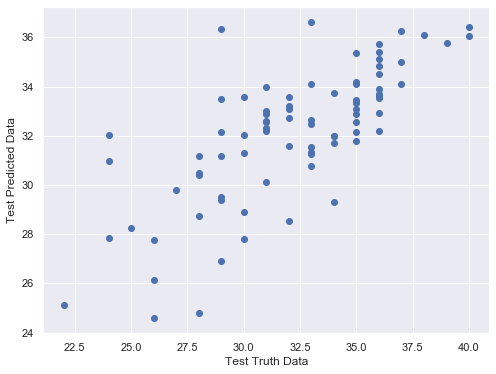

In [91]:
## Relationship Between Real Data & Predicted Data

plt.scatter(Y_test,reg_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [92]:
## Calculating Residual
residuals = Y_test - reg_pred

In [93]:
residuals

162    2.302065
60     1.664664
61     2.471551
63     3.198677
69     1.922567
         ...   
169    0.369605
232   -7.337625
144    1.452763
208   -3.613623
105   -3.111265
Name: Temperature, Length: 81, dtype: float64

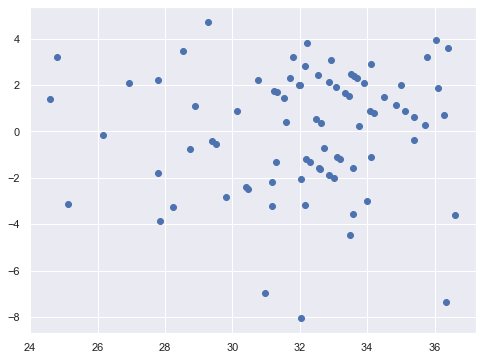

In [95]:
#Scatter Plot with predictions and residual
#Uniform Distributions
plt.scatter(reg_pred, residuals)

# Performance Metrics

In [96]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [97]:
print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

6.954871737664063
2.175574643410082
2.6372090811431814


# R Squared and Adjusted R-Squared

In [98]:
#R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.5400944035274453


In [99]:
#Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.48899378169716146

# Ridge Regression Model Prediction

In [100]:
#Ridge Regression
from sklearn.linear_model import Ridge

In [101]:
ridge=Ridge()

In [102]:
ridge.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Print the coefficients and the intercept

In [103]:
#print the coefficients
print(ridge.coef_)

[-1.2794179  -0.53077265 -0.2465204   0.92569657 -0.18919001  0.07649494
  0.56658722  0.16202852]


In [104]:
#print the intercept
print(ridge.intercept_)

32.17791411042945


In [105]:
#Prediction for the Test data
ridge_pred = ridge.predict(X_test)

In [106]:
ridge_pred

array([31.69144444, 33.2935903 , 33.50387348, 31.80266374, 33.06716673,
       34.79279395, 33.56245552, 33.37662923, 32.16841261, 33.10340339,
       33.73044254, 27.79847742, 35.3664068 , 29.28757963, 32.16049309,
       32.03644783, 34.08602833, 28.26049871, 36.12504216, 34.53978659,
       32.85348434, 33.49239279, 33.73559957, 32.94785926, 35.78078545,
       28.78247581, 32.16115609, 33.18222939, 27.80160773, 32.1573772 ,
       26.17225893, 26.95070529, 34.10125837, 31.97467139, 32.98839516,
       30.46023192, 28.90164342, 32.56410602, 27.86157493, 35.33116087,
       32.50740792, 34.14556116, 34.00825729, 31.19601771, 36.39691995,
       34.1901192 , 24.82779667, 35.12583298, 33.94222249, 29.53840954,
       31.30561469, 32.60961155, 35.74614361, 32.30020832, 30.42867201,
       30.12133671, 32.90798988, 36.29000623, 31.26246543, 33.476286  ,
       32.45715913, 32.69016291, 31.17800724, 24.59682778, 31.58162674,
       36.03399076, 29.437915  , 29.77831333, 35.0032777 , 33.58

# Assumptions of Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

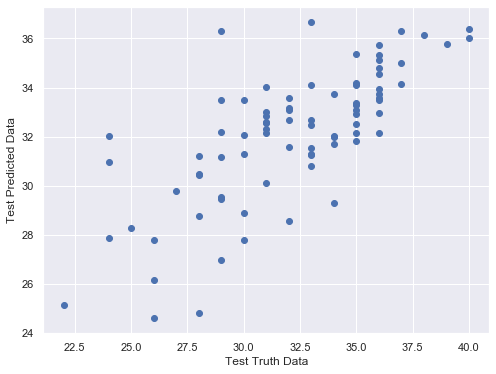

In [107]:
## Relationship Between Real Data & Predicted Data.

plt.scatter(Y_test,ridge_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [108]:
#Calculating residuals
residuals=Y_test- ridge_pred

In [109]:
residuals

162    2.308556
60     1.706410
61     2.496127
63     3.197336
69     1.932833
         ...   
169    0.322393
232   -7.299407
144    1.451964
208   -3.663754
105   -3.118553
Name: Temperature, Length: 81, dtype: float64

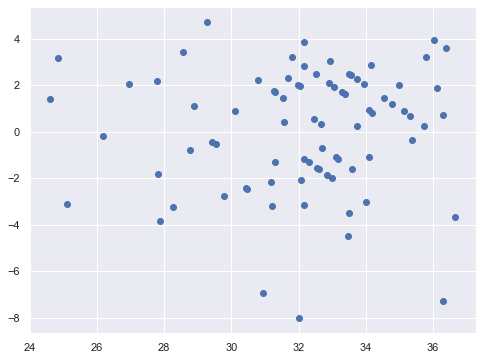

In [110]:
#SCatter plot with predictions and residual
#uniform distribution
plt.scatter(ridge_pred,residuals)

# Performance Metrics

In [111]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

6.945929488701437
2.17678023475141
2.635513135748224


# R Squared and Adjusted R Squared

In [112]:
#R Squared

from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.540685728644297


In [113]:
#Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.48965080960477436

# Lasso Regression Model Prediction

In [114]:
#Lasso Regression
from sklearn.linear_model import Lasso

In [115]:
lasso = Lasso()

In [116]:
lasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Print the coefficients and the intercept

In [117]:
#print the coefficients
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.        ]


In [118]:
#print the Intercept
print(lasso.intercept_)

32.17791411042945


In [119]:
#Prediction for the Test data
lasso_pred = lasso.predict(X_test)

In [120]:
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

# Assumptions of Lasso Regression

Text(0, 0.5, 'Test Predicted Data')

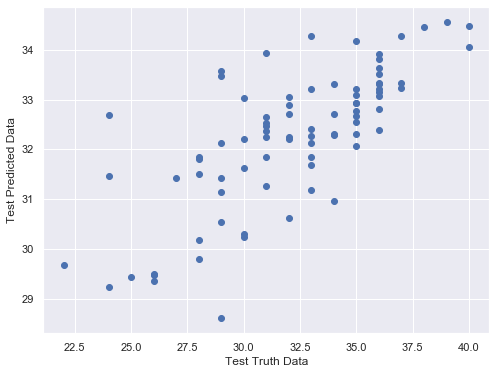

In [121]:
#Relationship Between Real Data & Predicted Data.

plt.scatter(Y_test,lasso_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [122]:
#Calculating residuals
residuals=Y_test- lasso_pred

In [123]:
residuals

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
169    0.583574
232   -4.568827
144    0.882714
208   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

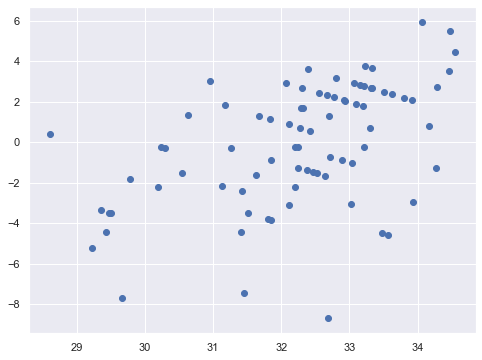

In [124]:
#SCatter plot with predictions and residual
#uniform distribution

plt.scatter(lasso_pred,residuals)

# Performance Metrics

In [125]:
#Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

9.10609532182792
2.4978660766652743
3.0176307464346794


# R Squared and Adjusted R Squared

In [126]:
#R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)

0.39784019626969913


In [127]:
#Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.33093355141077685

# Elastic Net Regression Model Prediction

In [128]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet

In [129]:
elastic = ElasticNet()

In [130]:
elastic.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# Print the coefficients and the intercept

In [131]:
#print the coefficients
print(elastic.coef_)

[-0.69609015 -0.10346124 -0.01326848  0.67544389  0.10159204  0.2536889
  0.06695761  0.12353856]


In [132]:
#print the Intercepts
print(elastic.intercept_)

32.17791411042945


In [133]:
#Prediction for the Test data
elastic_pred = elastic.predict(X_test)

In [135]:
elastic_pred

array([31.89258205, 32.9677374 , 32.64302354, 31.70193402, 32.96553828,
       33.9101536 , 33.48248837, 32.76141763, 32.06160308, 32.74066709,
       33.38929459, 29.86338625, 34.24685756, 30.64929515, 32.81579111,
       32.30088409, 32.93037203, 29.4074105 , 35.05990855, 33.90346654,
       32.4657043 , 33.34822904, 33.50840351, 32.896049  , 35.08611865,
       29.95950714, 32.22868286, 32.50117704, 29.36405878, 32.09704512,
       29.1567074 , 28.62925758, 33.28097511, 32.23763392, 32.70304145,
       31.26486337, 29.99833358, 32.40064663, 29.17674335, 33.97883421,
       32.79943266, 33.55509173, 34.16404775, 31.66961619, 34.51885869,
       33.41160246, 29.36878451, 33.9729948 , 33.43267658, 30.26746954,
       31.53589643, 32.39408951, 34.59727739, 32.13628815, 31.44578866,
       30.86305762, 32.51240763, 34.79711616, 31.6000036 , 33.48601465,
       32.21394851, 32.45714007, 31.19768117, 28.92790324, 31.82855244,
       34.85008434, 30.74918395, 30.96552444, 33.86068977, 32.99

# Assumptions of ElasticNet Regression

Text(0, 0.5, 'Test Predicted Data')

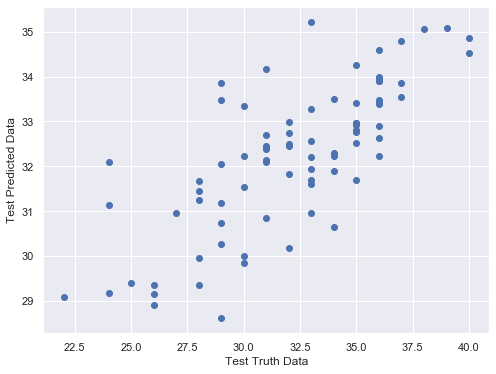

In [136]:
#Relation Between Real Data and Predicted Data

plt.scatter(Y_test,elastic_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [137]:
#Calculating residuals
residuals=Y_test- elastic_pred

In [138]:
residuals

162    2.107418
60     2.032263
61     3.356976
63     3.298066
69     2.034462
         ...   
169    0.434044
232   -4.853750
144    1.293811
208   -2.203997
105   -7.099752
Name: Temperature, Length: 81, dtype: float64

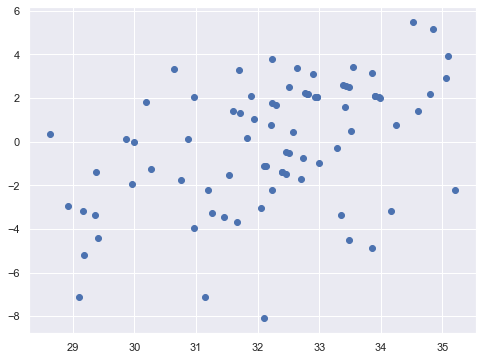

In [139]:
#Scatter plot with predictions and residual
#uniform distribution

plt.scatter(elastic_pred,residuals)

# Performance Metrics

In [140]:
#Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))

8.312748998634081
2.396178965477738
2.8831838301839308


# R Squared and Adjusted R Squared

In [141]:
#R Squared

from sklearn.metrics import r2_score
score=r2_score(Y_test,elastic_pred)
print(score)

0.45030189905019036


In [142]:
#Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.38922433227798925